Tensorflow (Keras API)

In [32]:
from keras import models, optimizers
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from matplotlib import pyplot as plt
import time

def data_summary(X_train, y_train, X_test, y_test):
    print('Train images shape:', X_train.shape)
    print('Train labels shape:', y_train.shape)
    print('Test images shape:', X_test.shape)
    print('Test labels shape:', y_test.shape)
    print('Train labels:', y_train)
    print('Test labels:', y_test)

In [24]:
# Load data
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()

In [25]:
# Check state of dataset
data_summary(X_train_raw, y_train_raw, X_test_raw, y_test_raw)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Train labels: [5 0 4 ... 5 6 8]
Test labels: [7 2 1 ... 4 5 6]


Label 9


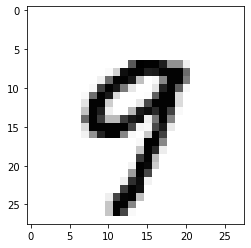

In [26]:
i = 45
plt.imshow(X_train_raw[i], 'Greys')
print ('Label', y_train_raw[i])

In [58]:
# Reshape data
X_train = X_train_raw.reshape((X_train_raw.shape[0], 28 * 28))
X_train = X_train.astype('float32') / 255
X_test = X_test_raw.reshape((X_test_raw.shape[0], 28 * 28))
X_test = X_test.astype('float32') / 255

# Categorically encode labels
y_train = to_categorical(y_train_raw, 10)
y_test = to_categorical(y_test_raw, 10)

# Check state of dataset
data_summary(X_train, y_train, X_test, y_test)

Train images shape: (60000, 784)
Train labels shape: (60000, 10)
Test images shape: (10000, 784)
Test labels shape: (10000, 10)
Train labels: [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Test labels: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [63]:
# Build neural network
model = models.Sequential()
model.add(Dense(784, activation='relu', input_shape=(28 * 28,))) #activation functions: 
model.add(Dropout(.1))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

#############################
optimizer = optimizers.Adam(lr=0.01)

# Compile model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#t1 = time.time()
# Train model
history = model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))
#t2 = time.time()

#print (t2-t1)
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 28s 471us/step - loss: 0.2956 - accuracy: 0.9167 - val_loss: 0.1278 - val_accuracy: 0.9605
Epoch 2/10
60000/60000 [==============================] - 26s 436us/step - loss: 0.1477 - accuracy: 0.9566 - val_loss: 0.1440 - val_accuracy: 0.9593
Epoch 3/10
60000/60000 [==============================] - 25s 421us/step - loss: 0.1324 - accuracy: 0.9615 - val_loss: 0.1250 - val_accuracy: 0.9631
Epoch 4/10
60000/60000 [==============================] - 25s 415us/step - loss: 0.1271 - accuracy: 0.9638 - val_loss: 0.1268 - val_accuracy: 0.9632
Epoch 5/10
60000/60000 [==============================] - 25s 412us/step - loss: 0.1154 - accuracy: 0.9673 - val_loss: 0.1083 - val_accuracy: 0.9682
Epoch 6/10
60000/60000 [==============================] - 26s 432us/step - loss: 0.1032 - accuracy: 0.9711 - val_loss: 0.1238 - val_accuracy: 0.9668
Epoch 7/10
60000/60000 [==============================] 

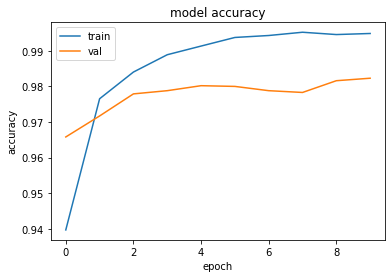

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

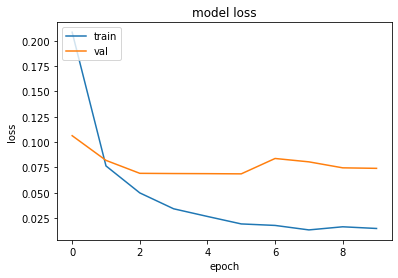

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
# Summary of neural network
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 818,970
Trainable params: 818,970
Non-trainable params: 0
_________________________________________________________________


Label 9


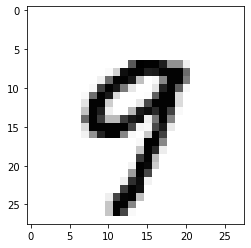

In [18]:
i = 45
plt.imshow(X_train_raw[i], 'Greys')
print ('Label', y_train_raw[i])

image = X_train_raw[i].reshape(1, 784)

In [19]:
layer_outputs = [layer.output for layer in model.layers[0:3]]
activation_model = models.Model(inputs=model.input,outputs=layer_outputs)

In [20]:
activations = activation_model.predict(image)

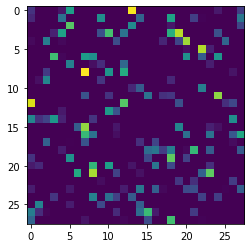

In [35]:
plt.imshow(activations[0].reshape(28,28))

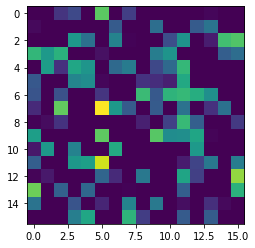

In [36]:
plt.imshow(activations[1].reshape(16,16))

<BarContainer object of 10 artists>

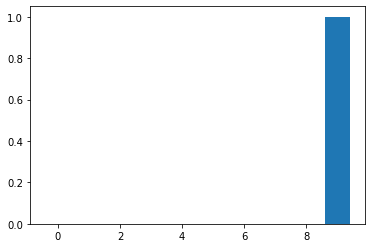

In [37]:
plt.bar(range(10),activations[2][0])

In [64]:
activations[2][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

PyTorch

In [43]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from time import time
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

In [44]:
y_test = y_test_raw.astype(np.int64)
y_train = y_train_raw.astype(np.int64)

In [46]:
class DataFormat(Dataset):
    def __init__(self, a, b):
        self.x = a
        self.y = b

    def __getitem__(self, item): #indexing
        return self.x[item], self.y[item]

    def __len__(self): #length
        return len(self.y)

In [47]:
testloader = DataLoader(DataFormat(X_test, y_test), shuffle=True, batch_size=64)
trainloader = DataLoader(DataFormat(X_train, y_train), shuffle=True, batch_size=64)

In [48]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 784])
torch.Size([64])


In [49]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [53]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.9495138079086854
Epoch 1 - Training loss: 0.3250232120392038
Epoch 2 - Training loss: 0.26683783761537405
Epoch 3 - Training loss: 0.2257434664917653
Epoch 4 - Training loss: 0.19285185486554846
Epoch 5 - Training loss: 0.16735181420533132
Epoch 6 - Training loss: 0.14821327002302034
Epoch 7 - Training loss: 0.13162801666324264
Epoch 8 - Training loss: 0.11863097787669885
Epoch 9 - Training loss: 0.10762605213943416
Epoch 10 - Training loss: 0.09791195442997364
Epoch 11 - Training loss: 0.08965279742666303
Epoch 12 - Training loss: 0.08255843467998511
Epoch 13 - Training loss: 0.07653367332915571
Epoch 14 - Training loss: 0.07077129938746932

Training Time (in minutes) = 0.8308435837427776


Predicted Digit = 8


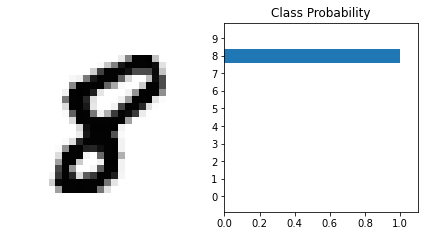

In [54]:
def view_classify(img, ps):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze(), 'Greys')
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

images, labels = next(iter(testloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [55]:
correct_count, all_count = 0, 0
for images,labels in testloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)

    
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
          correct_count += 1
        all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9734
